In [14]:
import csv
import numpy as np
import matplotlib.pyplot as plot
import re
import networkx as nx

In [15]:
# Getting location information 
readerLocations = csv.reader(open("locations.csv", "r"), delimiter=",")
locationList = list(readerLocations)
locations = np.array(locationList).astype("float")
nLocations = len(locations)

# Getting distance information
readerDistances = csv.reader(open("distances.csv", "r"), delimiter=",")
distanceList = list(readerDistances)
distances = np.array(distanceList).astype("float")

# Getting flow information
readerFlows = csv.reader(open("flows.csv", "r"), delimiter=",")
flowList = list(readerFlows)
flows = np.array(flowList).astype("float")

In [16]:
# Getting optimal solution information
#with open('bestOutcomes.txt', 'r') as file:
#    pairingText = file.readlines()

with open('mathy_t_test.txt', 'r') as file:
    pairingText = file.readlines()

# pairings = np.empty((nLocations, 2))
# for i in range(len(pairingText)):
#     # First column is facilities, second is locations
#     pairNums = re.findall('\d+',pairingText[i])
#     pairings[i] = pairNums

pairings = np.empty((nLocations, 2))
print(len(pairings))
for i in range(len(pairings)):
    # First column is facilities, second is locations
    pairNums = re.findall('\d+, \d+',pairingText[0])
    pair = re.findall('\d+',pairNums[i])
    pairings[i] = [pair[0],pair[1]]

print(pairings)


25
[[ 0.  2.]
 [ 1. 10.]
 [ 2.  7.]
 [ 3. 12.]
 [ 4. 24.]
 [ 5. 23.]
 [ 6.  0.]
 [ 7.  6.]
 [ 8.  9.]
 [ 9.  1.]
 [10.  4.]
 [11. 17.]
 [12. 14.]
 [13. 11.]
 [14. 15.]
 [15. 16.]
 [16. 19.]
 [17. 22.]
 [18. 13.]
 [19. 20.]
 [20.  5.]
 [21.  3.]
 [22. 21.]
 [23. 18.]
 [24.  8.]]


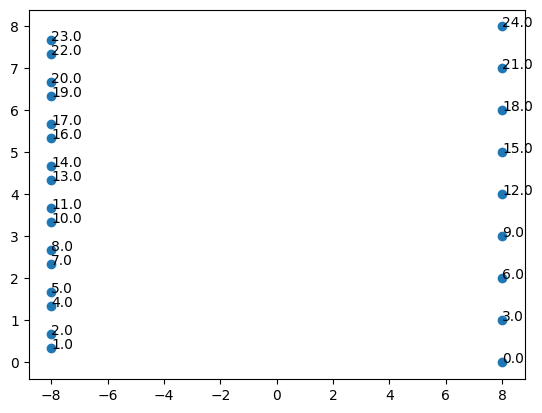

In [17]:
# Plotting network
x = locations[:,0]
y = locations[:,1]
plot.scatter(x, y)

labels = pairings[:,0]

for i in range(len(x)):
    label = str(labels[i])
    plot.annotate(label, (x[i], y[i]))

plot.show()

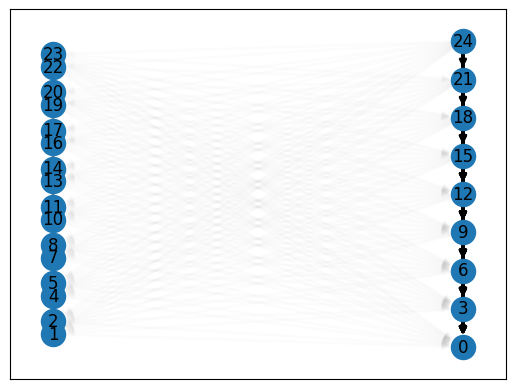

In [20]:
# Defining graph nodes
facilityG = nx.DiGraph()
pos = {}
labels = {}
#facilityG.add_nodes_from(range(1,len(locations)+1))
for i in range(len(pairings)):
    pos[pairings[i,0]] = (x[i],y[i])
    labels[pairings[i,0]] = str(int(pairings[i,0]))

# Generating edge array
rawEdges = []
edgeColors = []
edgeAlphas = []
# for i in range(1,nLocations+1):
#     for j in range(1,nLocations+1):
#         possibleEdge = (i,j)
#         if i != j and flows[i-1,j-1] > 0:
#             rawEdges.append(possibleEdge)
#             edgeColors.append(flows[i-1,j-1])
#             edgeAlphas.append(flows[i-1,j-1]/101)
for i in range(nLocations):
    for j in range(nLocations):
        possibleEdge = (i,j)
        if i != j and flows[i,j] > 0:
            rawEdges.append(possibleEdge)
            edgeColors.append(flows[i,j])
            edgeAlphas.append(flows[i,j]/101)

# Defining graph edges
facilityG.add_edges_from(rawEdges)
cmap = plot.cm.plasma

# Drawing the graph
#nodes = nx.draw_networkx_nodes(facilityG, pos, with_labels=True, node_color='white', edge_color=edgeColors, edge_cmap = cmap, arrows=True)
#nodes = nx.draw_networkx_nodes(facilityG, pos,nodelist=range(1,len(locations)+1))#,node_color='white')
nodes = nx.draw_networkx_nodes(facilityG, pos,nodelist=range(len(locations)))#,node_color='white')


# Switch between color mode and opacity mode
# Color mode
#displayMode = 0
# Opacity mode
displayMode = 1

if displayMode == 0:
    edges = nx.draw_networkx_edges(facilityG,pos,edge_color=edgeColors,edge_cmap=cmap,width = 2,arrows=True)
elif displayMode == 1:
    edges = nx.draw_networkx_edges(facilityG,pos,width = 2,arrows=True)
else:
    raise ValueError("Select a valid display mode above")

facilityLabels = nx.draw_networkx_labels(facilityG,pos,labels)

# set alpha value for each edge
for i in range(len(edgeAlphas)):

    # Setting visibility threshold
    #if abs(edgeAlphas[i]) < 0.75:
        #edgeAlphas[i] = 0

    # Assigning edge opacity
    edges[i].set_alpha(abs(edgeAlphas[i]))

for i in range(len(pairings)):
    nodes.label = str(pairings[i,0])

plot.show()